# Linear Regression model for Close prediction

In [149]:
from sklearn import linear_model
import pandas as pd
import matplotlib as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [150]:
df = pd.read_csv("../X-Y data.csv")

In [151]:
df = df.fillna(0)

In [152]:
MLDF_train = df[:10000][[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc','close-aapl']]

In [153]:
MLDF_test = df[10001:][[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc','close-aapl']]

Splitting X and Y

In [154]:
X = MLDF_train[[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc']]

In [155]:
Y = MLDF_train[['close-aapl']]

In [156]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Testing

In [157]:
X_test=MLDF_test[[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc']]

In [158]:
Y_test = MLDF_test['close-aapl']

In [159]:
Y_predicted = regr.predict(X_test)

In [160]:
prediction = pd.DataFrame()

In [161]:
prediction['cours AAPL'] = Y_test
prediction["pred_Linear"] = Y_predicted 

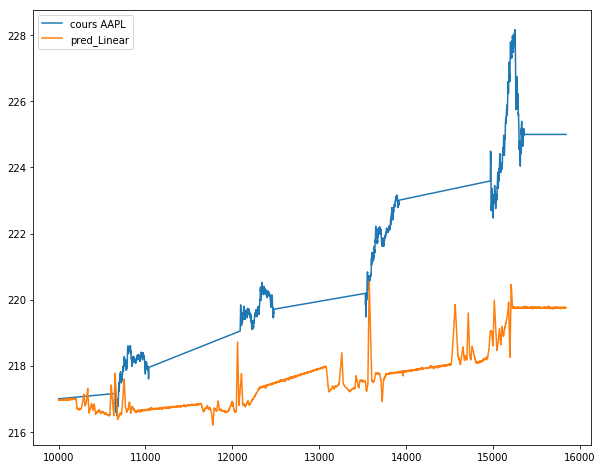

In [162]:
prediction.plot(figsize=(10,8))

In [163]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
error_value = mean_absolute_error(Y_test, Y_predicted)
error_value

3.035736070064868

# Bayesian Ridge Regression is used for regression

In [164]:
reg1 = linear_model.BayesianRidge()
reg1.fit(X, Y)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

Testing

In [165]:
Y_predicted = reg1.predict(X_test)

prediction["y_pred1"] = Y_predicted 

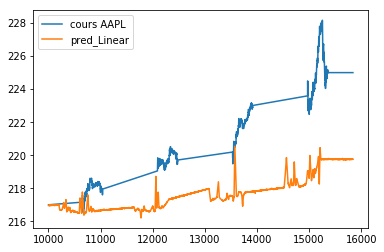

In [166]:
prediction.plot()

# Lasso regression

In [167]:
reg2 = linear_model.Lasso(alpha = 0.1)
reg2.fit(X, Y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

testing

In [168]:
Y_predicted = reg2.predict(X_test)

In [169]:
prediction['cours AAPL'] = Y_test
prediction["pred_Lasso"] = Y_predicted 

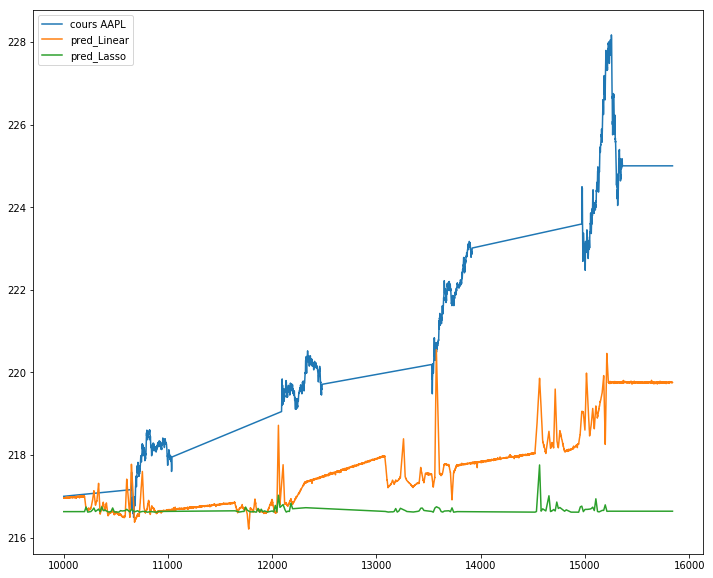

In [170]:
prediction.plot(figsize=(12,10))

In [171]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
error_value = mean_absolute_error(Y_test, Y_predicted)
error_value

4.057689068116949